# 해외 축구선수 이적료 예측 미션

### 1. 출처 : [데이콘 - 해외 축구 선수 이적료 예측 미션](https://dacon.io/competitions/open/235538/overview/description/)


### 2. 목표 : 축구선수의 정보와 능력치가 포함된 데이터의 선수들의 이적료를 예측


### 3. Column 설명


1. id : 선수 고유의 아이디
2. name : 이름
3. age : 나이
4. continent : 선수들의 국적이 포함되어 있는 대륙입니다
5. contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
6. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
7. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
8. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
9. stat_overall : 선수의 현재 능력치 입니다.
10. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
11. stat_skill_moves : 선수의 개인기 능력치 입니다.
12. value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.



---

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
sns.set(style = "whitegrid")

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
matplotlib.rc('font', family='AppleGothic')
#matplotlib.rc('font', family='Malgun Gothic')

# 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rcParams['axes.unicode_minus'] = False

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

---

## 데이터 불러오기

In [3]:
# FIFA_train.csv 데이터를 불러와서 raw_train 이라는 변수에 할당합니다.
raw_train = pd.read_csv("data/FIFA_train.csv") 

print(raw_train.shape) # raw_train 데이터의 row, column 갯수를 출력합니다.
raw_train.head() # raw_train 데이터의 상위 5개 데이터를 출력합니다.

(8932, 12)


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [4]:
# FIFA_test.csv 데이터를 불러와서 raw_test 라는 변수에 할당합니다.
raw_test = pd.read_csv("data/FIFA_test.csv") 

print(raw_test.shape) # raw_test 데이터의 row, column 갯수를 출력합니다.
raw_test.head() # raw_test 데이터의 상위 5개 데이터를 출력합니다.

(3828, 11)


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


test 데이터에는 value 컬럼이 없다는 것을 확인할 수 있습니다.

---

## 데이터 확인하기

In [5]:
# raw_train 데이터를 카피하여 train 이라는 변수에 할당합니다.
train = raw_train.copy()

In [6]:
# train 데이터에 결측치가 있는지 확인합니다.
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

train 데이터에는 결측치가 없다는 것을 확인할 수 있습니다.

In [7]:
# raw_test 데이터를 카피하여 test 이라는 변수에 할당합니다.
test = raw_test.copy()

In [8]:
# test 데이터에 결측치가 있는지 확인 합니다.
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

test 데이터에도 결측치가 없다는 것을 확인할 수 있습니다.

In [9]:
# train 데이터의 각 컬럼별 type 을 확인합니다.
train.dtypes

id                    int64
name                 object
age                   int64
continent            object
contract_until       object
position             object
prefer_foot          object
reputation          float64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
value               float64
dtype: object

계약기간(contract_until)의 경우, 연도임에도 문자열(object)로 type 이 되어 있습니다.

In [10]:
# test 데이터의 각 컬럼별 type 을 확인합니다.
test.dtypes

id                    int64
name                 object
age                   int64
continent            object
contract_until       object
position             object
prefer_foot          object
reputation          float64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
dtype: object

test 데이터도 계약기간(contract_until)이, 연도임에도 문자열(object)로 type 이 되어 있습니다.

---

## Data preprocessing

In [11]:
# contract_until 컬럼의 종류와 종류별 갯수를 출력합니다.
train["contract_until"].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
Jan 12, 2019       1
May 31, 2020       1
Name: contract_until, dtype: int64

In [12]:
# contract_until 컬럼의 표기를 통일화 시키기 위해 datetime type 으로 변경하고
# contract_until(clean) 이라는 신규 컬럼에 할당합니다.
train["contract_until(clean)"] = pd.to_datetime(train["contract_until"])

# contract_until(clean) 컬럼의 종류별 갯수를 출력합니다.
train["contract_until(clean)"].value_counts()

2019-01-01    2368
2021-01-01    2308
2020-01-01    2041
2022-01-01     761
2023-01-01     506
2019-06-30     501
2018-01-01     327
2018-12-31      64
2019-05-31      19
2024-01-01      12
2019-01-31      10
2020-06-30       9
2025-01-01       3
2020-05-31       1
2026-01-01       1
2019-01-12       1
Name: contract_until(clean), dtype: int64

In [13]:
print(train.shape) # train 데이터의 row, column 갯수를 출력합니다.
train.head() # train 데이터의 상위 5개 자료를 출력합니다.

(8932, 13)


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_until(clean)
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,2021-01-01
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,2020-01-01
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,2021-01-01
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,2020-01-01
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,2021-01-01


contraint_until(clean) 컬럼이 생성될 것을 확인 할 수 있습니다.

In [14]:
# contract_until(clean) 컬럼을 dt 옵션을 사용하여 연/월/일로 구분 합니다.

train["contract_until(year)"] = train["contract_until(clean)"].dt.year
train["contract_until(month)"] = train["contract_until(clean)"].dt.month
train["contract_until(day)"] = train["contract_until(clean)"].dt.day

print(train.shape) # train 데이터의 row, column 갯수를 출력합니다.

# contract_until(clean) 과 연관된 컬럼의 상위 5개 자료를 출력합니다.
train[["contract_until(clean)", "contract_until(year)", "contract_until(month)", "contract_until(day)"]].head()

(8932, 16)


,contract_until(clean),contract_until(year),contract_until(month),contract_until(day)
0,2021-01-01,2021,1,1
1,2020-01-01,2020,1,1
2,2021-01-01,2021,1,1
3,2020-01-01,2020,1,1
4,2021-01-01,2021,1,1


In [15]:
# test 데이터의 contract_until 컬럼도 train 데이터와 동일하게 처리 해줍니다.
test["contract_until"].value_counts()

test["contract_until(clean)"] = pd.to_datetime(test["contract_until"])

test["contract_until(clean)"].value_counts()

test["contract_until(year)"] = test["contract_until(clean)"].dt.year
test["contract_until(month)"] = test["contract_until(clean)"].dt.month
test["contract_until(day)"] = test["contract_until(clean)"].dt.day

print(test.shape) # train 데이터의 row, column 갯수를 출력합니다.

# contract_until(clean) 과 연관된 컬럼의 상위 5개 자료를 출력합니다.
test[["contract_until(clean)", "contract_until(year)", "contract_until(month)", "contract_until(day)"]].head()

(3828, 15)


,contract_until(clean),contract_until(year),contract_until(month),contract_until(day)
0,2022-01-01,2022,1,1
1,2022-01-01,2022,1,1
2,2023-01-01,2023,1,1
3,2020-01-01,2020,1,1
4,2020-01-01,2020,1,1


---

## E.D.A

### age 컬럼

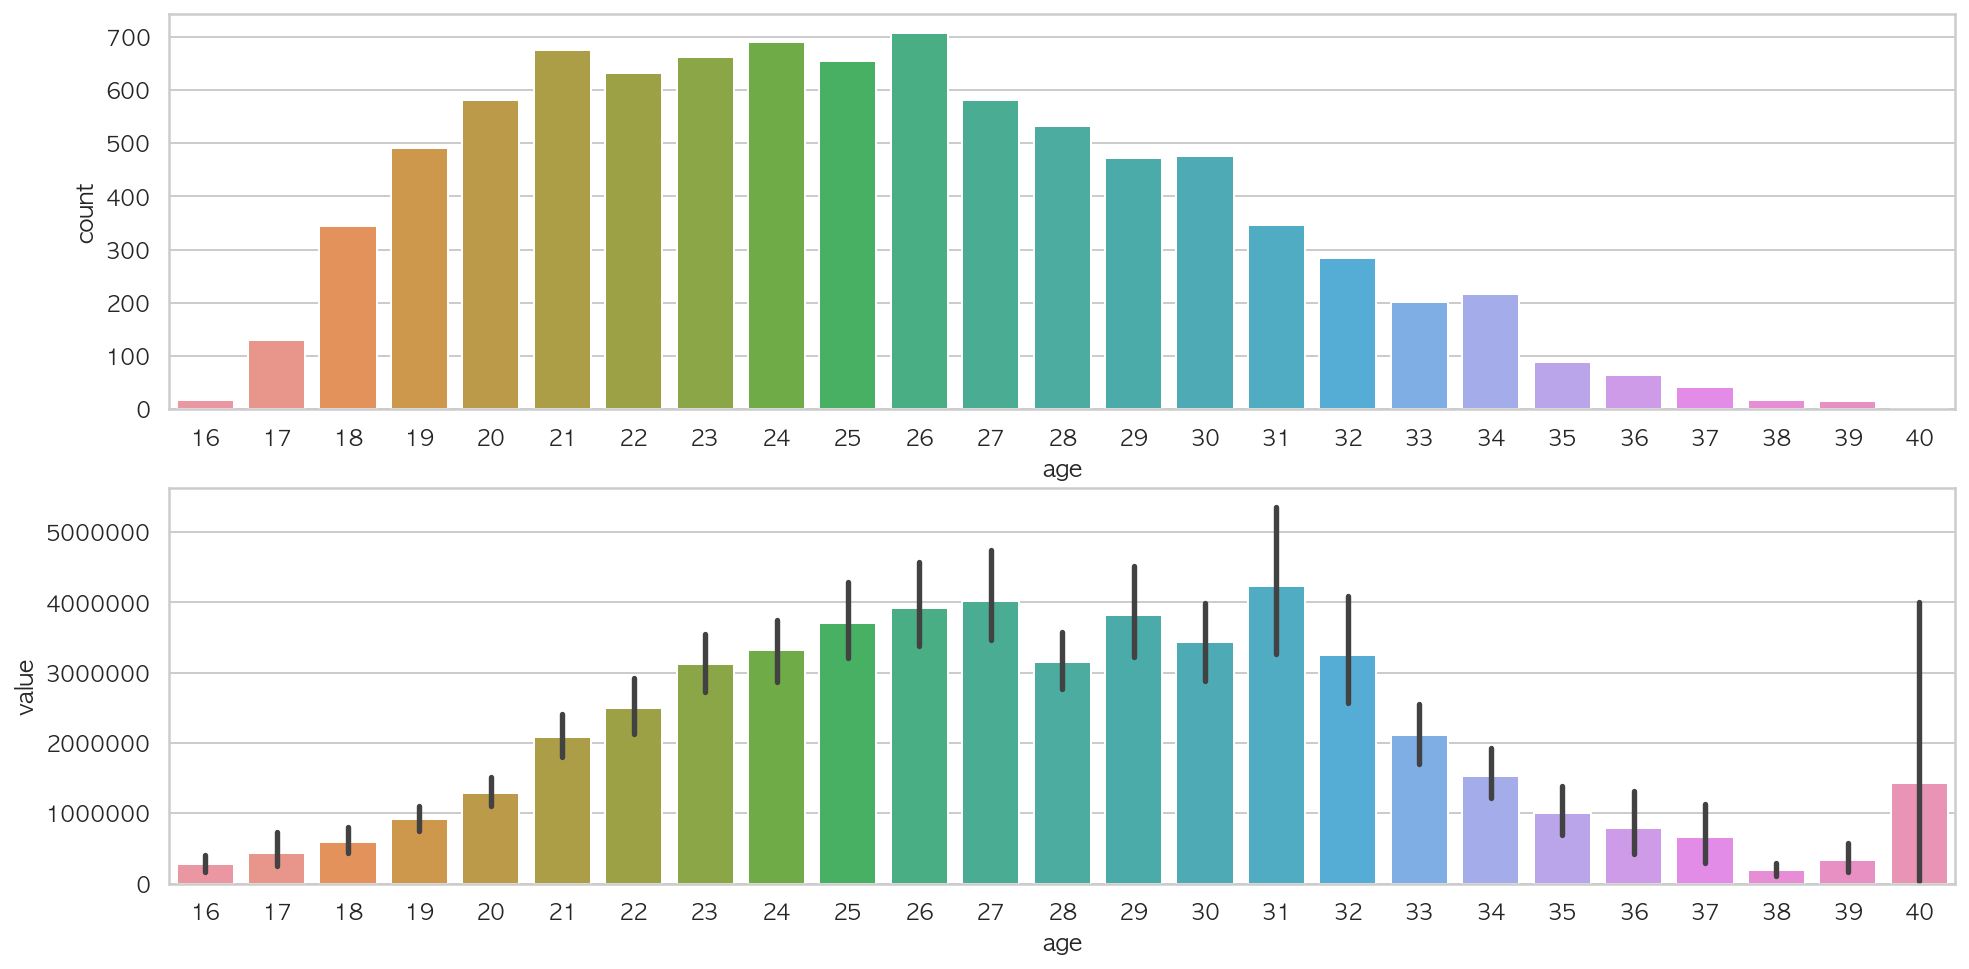

In [16]:
# 차트를 여러개 그리기 위한 설정을 합니다.
figure, ((ax1), (ax2)) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 설정 합니다.

# countplot 으로 연령대별 빈도를 시각화 하고, ax1 에 설정합니다.
sns.countplot(data = train, x = "age", ax = ax1)

# barplot 으로 연령대별 이적료를 시각화 하고, ax2 에 설정합니다.
sns.barplot(data = train, x = "age", y = "value", ax = ax2)

20 ~ 28세 사이의 선수가 많으며 이적료는 23 ~ 32세 사이의 선수 이적료가 높은 것을 확인 할 수 있습니다.

30 ~ 32세 선수의 경우 선수 숫자 대비 이적료가 높은 것으로 볼때, 실력이 있는 선수들이 많은 것으로 추측할 수 있습니다.

40대의 경우에는 편차가 굉장히 크게 나타나는대 40대 이상인 프로 축구 선수가 흔하지 않으므로 모수가 적어서 나타나는 현상이라고 추측할 수 있습니다.

In [17]:
# 연령이 40세인 데이터를 확인 합니다.
train[train["age"] == 40]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_until(clean),contract_until(year),contract_until(month),contract_until(day)
23,41,G. Buffon,40,europe,2019,GK,right,4.0,88,88,1.0,4000000.0,2019-01-01,2019,1,1
1613,2735,S. Bertoli,40,south america,2019,GK,right,1.0,73,73,1.0,270000.0,2019-01-01,2019,1,1
5168,8995,B. Castillo,40,south america,2021,GK,right,1.0,66,66,1.0,40000.0,2021-01-01,2021,1,1


확인 결과, 연령이 40세인 축구 선수는 3명 뿐이며 이적료가 가장 높은 선수(Buffon)와 가장 적은 선수(Castillo)의 차이가
무려 100배나 차이 나는 것을 확인 할 수 있습니다.

### continent 컬럼

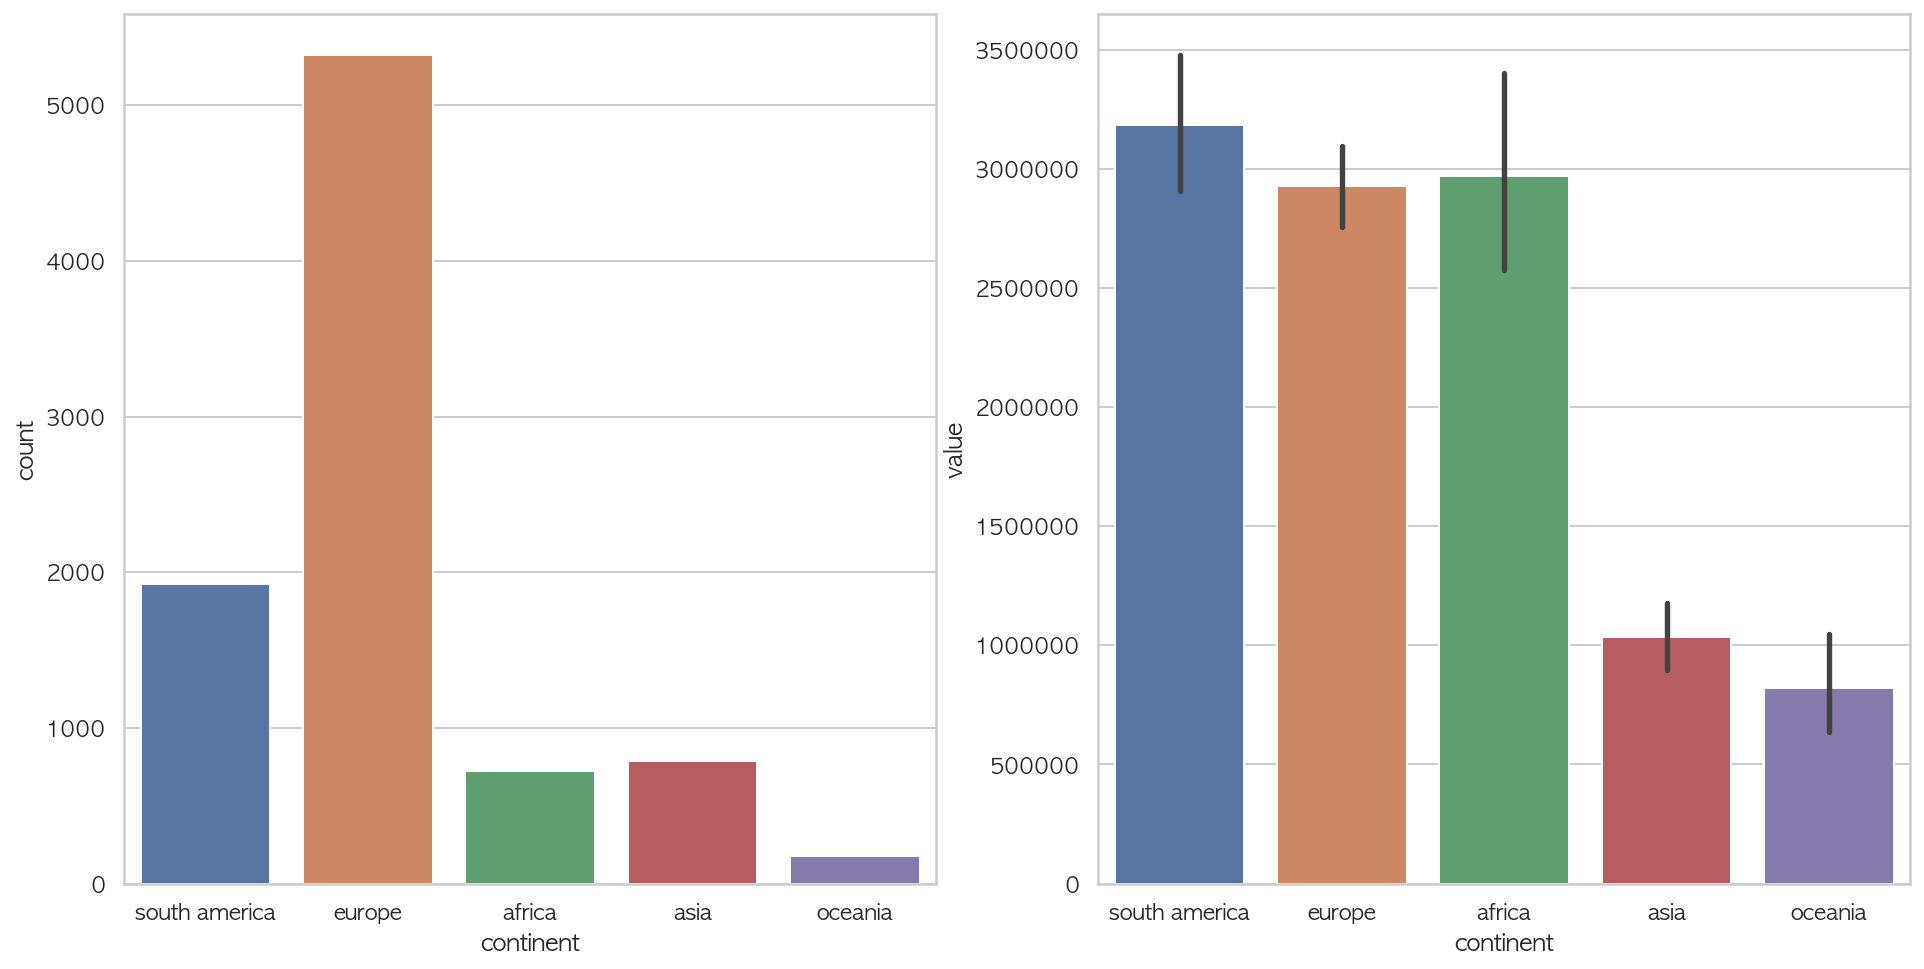

In [18]:
# 차트를 여러개 그리기 위한 설정을 합니다.
figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 설정 합니다.

# countplot 으로 대륙별 빈도를 시각화 하고, ax1 에 설정합니다.
sns.countplot(data = train, x = "continent", ax = ax1)

# barplot 으로 대륙별 이적료를 시각화 하고, ax2 에 설정합니다.
sns.barplot(data = train, x = "continent", y = "value", ax = ax2)

유럽 > 남미 > 아시아 > 아프리카 > 오세아니아 대륙 순서로 축구선수가 많은 것을 확인 할 수 있습니다.

남미, 아프리카 대륙 선수들이 축구선수 빈도에 비해 높은 이적료를 나타내고 있으며 이는 남미나 아프리카 선수 중에 실력이 있는(혹은 잠재력이 높은) 선수들이 많을 것이라는 추측을 할 수 있습니다.

### contract 컬럼

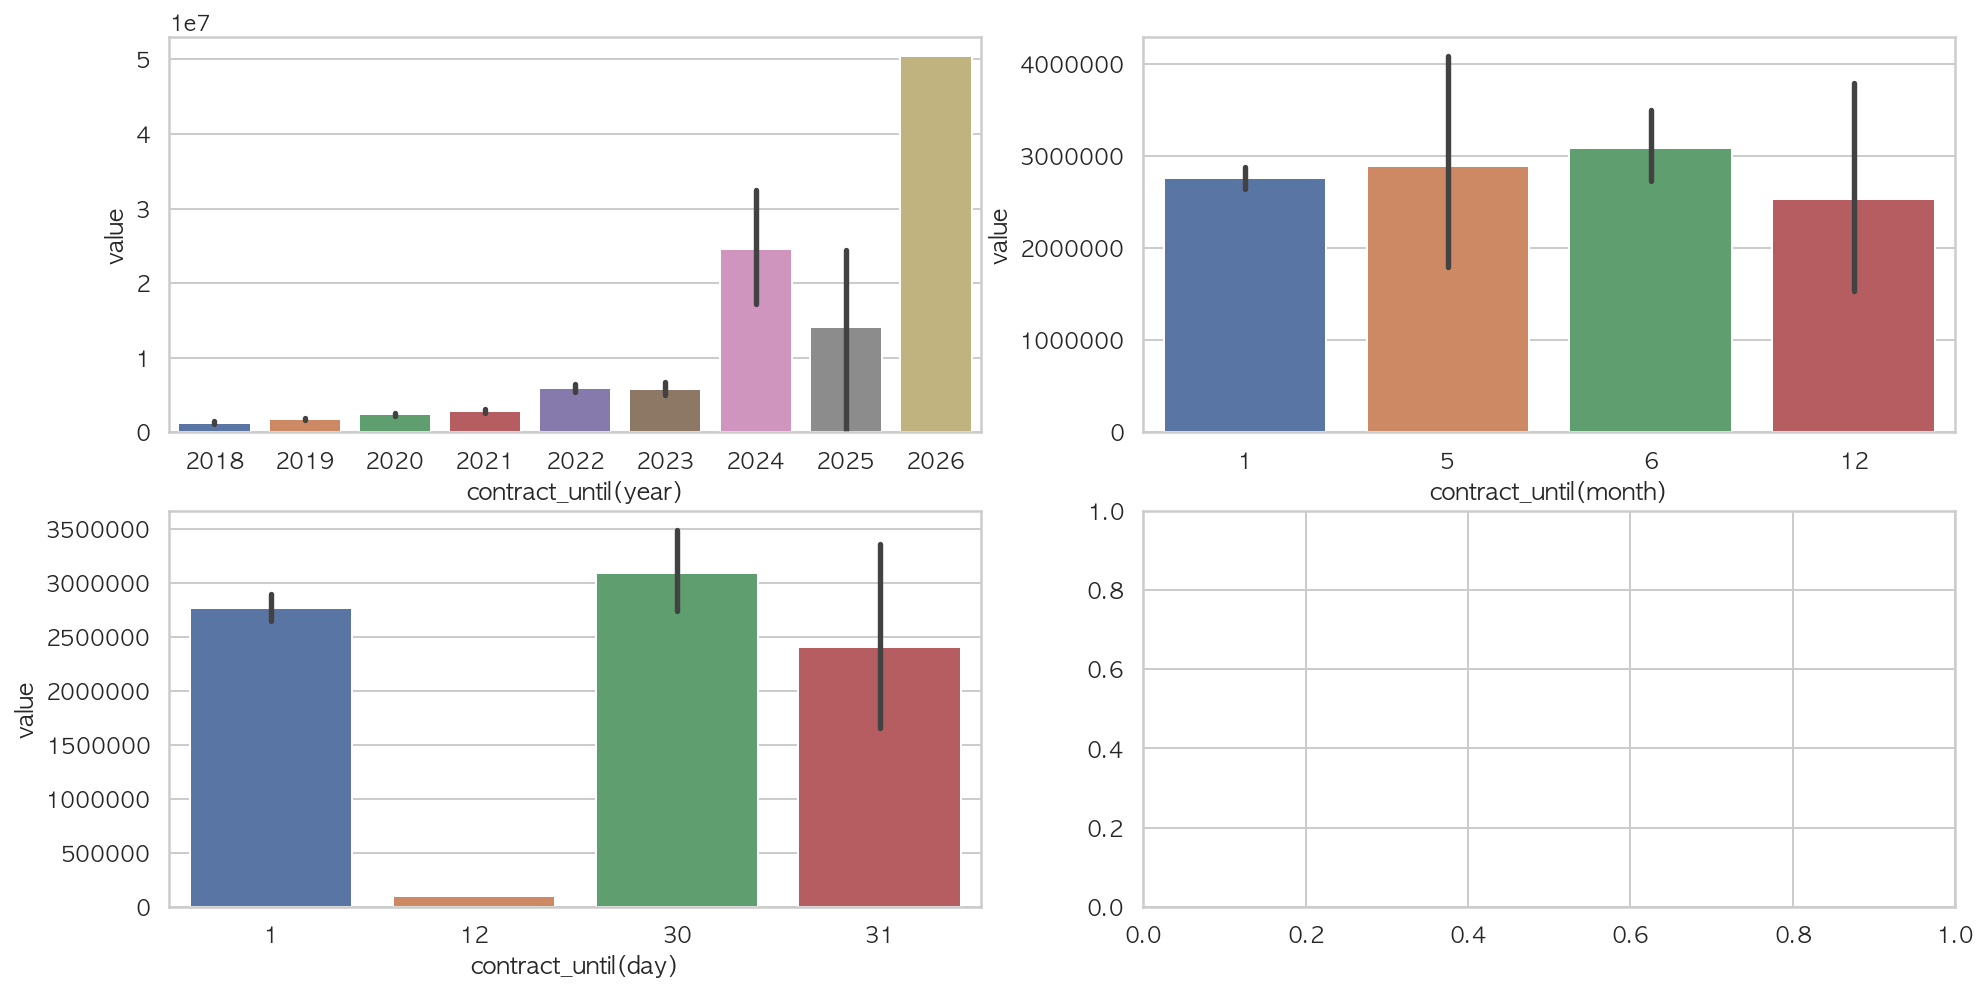

In [19]:
# 차트를 여러개 표현하기 위한 설정을 합니다.
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 고정합니다.

# barplot 으로 계약기간(연도)별 이적료를 시각화 하고, ax1 에 설정합니다.
sns.barplot(data = train, x = "contract_until(year)", y = "value", ax = ax1)

# barplot 으로 계약기간(월)별 이적료를 시각화 하고, ax1 에 설정합니다.
sns.barplot(data = train, x = "contract_until(month)", y = "value", ax = ax2)

# barplot 으로 계약기간(일)별 이적료를 시각화 하고, ax1 에 설정합니다.
sns.barplot(data = train, x = "contract_until(day)", y = "value", ax = ax3)

연도에 따른 연관성이 어느정도 있으나, 장기 계약(2024년 이후)에는 모수에 따른 편차가 있음을 알 수 있습니다.

월이나 일별 계약기간의 경우, 연관성이 나타나지 않기 때문에 이적료에 크게 영향을 미치지 않을 것이라고 판단할 수 있습니다.

### position 컬럼

In [20]:
train["position"].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

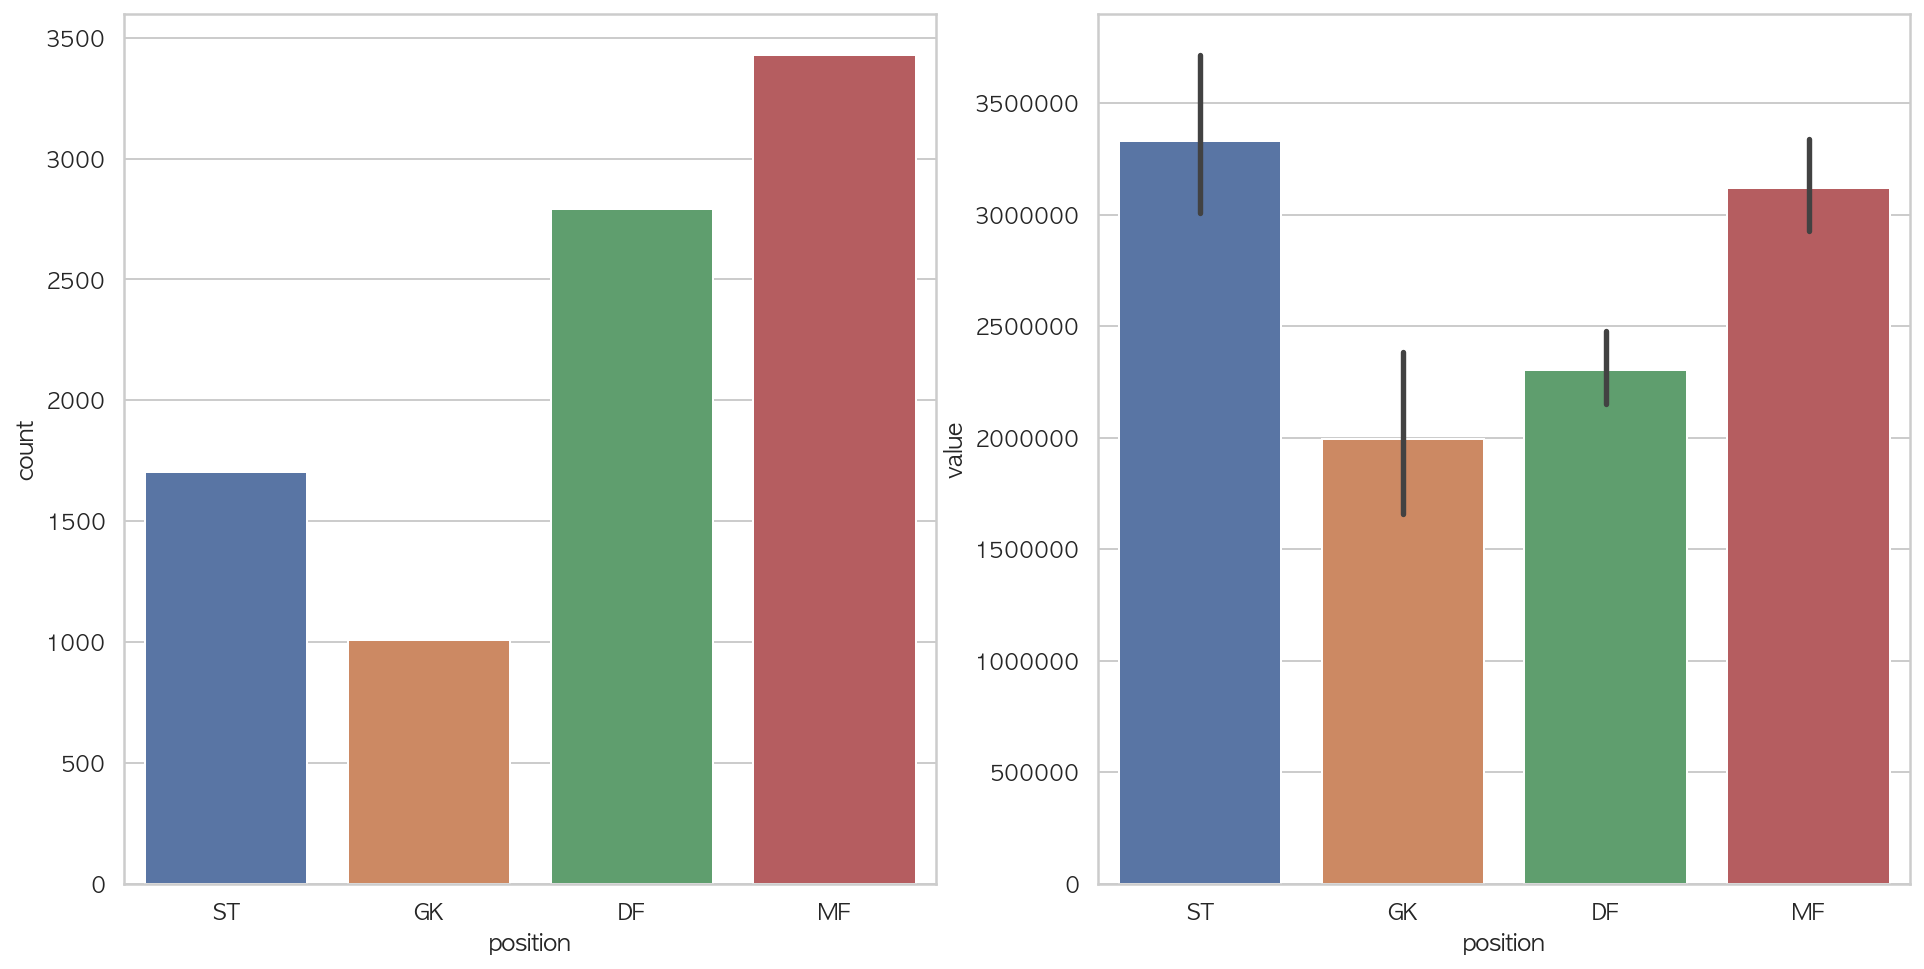

In [21]:
# 차트를 여러개 표현하기 위한 설정을 합니다.
figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 고정합니다.

# countplot 으로 포지션별 빈도를 시각화 하고, ax1 에 설정합니다.
sns.countplot(data = train, x = "position", ax = ax1)

# barplot 으로 포지션별 이적료를 시각화 하고, ax2 에 설정합니다.
sns.barplot(data = train, x = "position", y = "value", ax = ax2)

포지션의 경우 MF > DF > ST > GK 순으로 선수 숫자가 많지만 포지션에 따른 이적료는 ST 가 가장 높은 것을 확인 할 수 있습니다.

따라서, ST 포지션에 실력이 있는(혹은 잠재력이 높은) 선수가 많이 있을 것이라는 추측을 할 수 있습니다.

### prefer_foot 컬럼

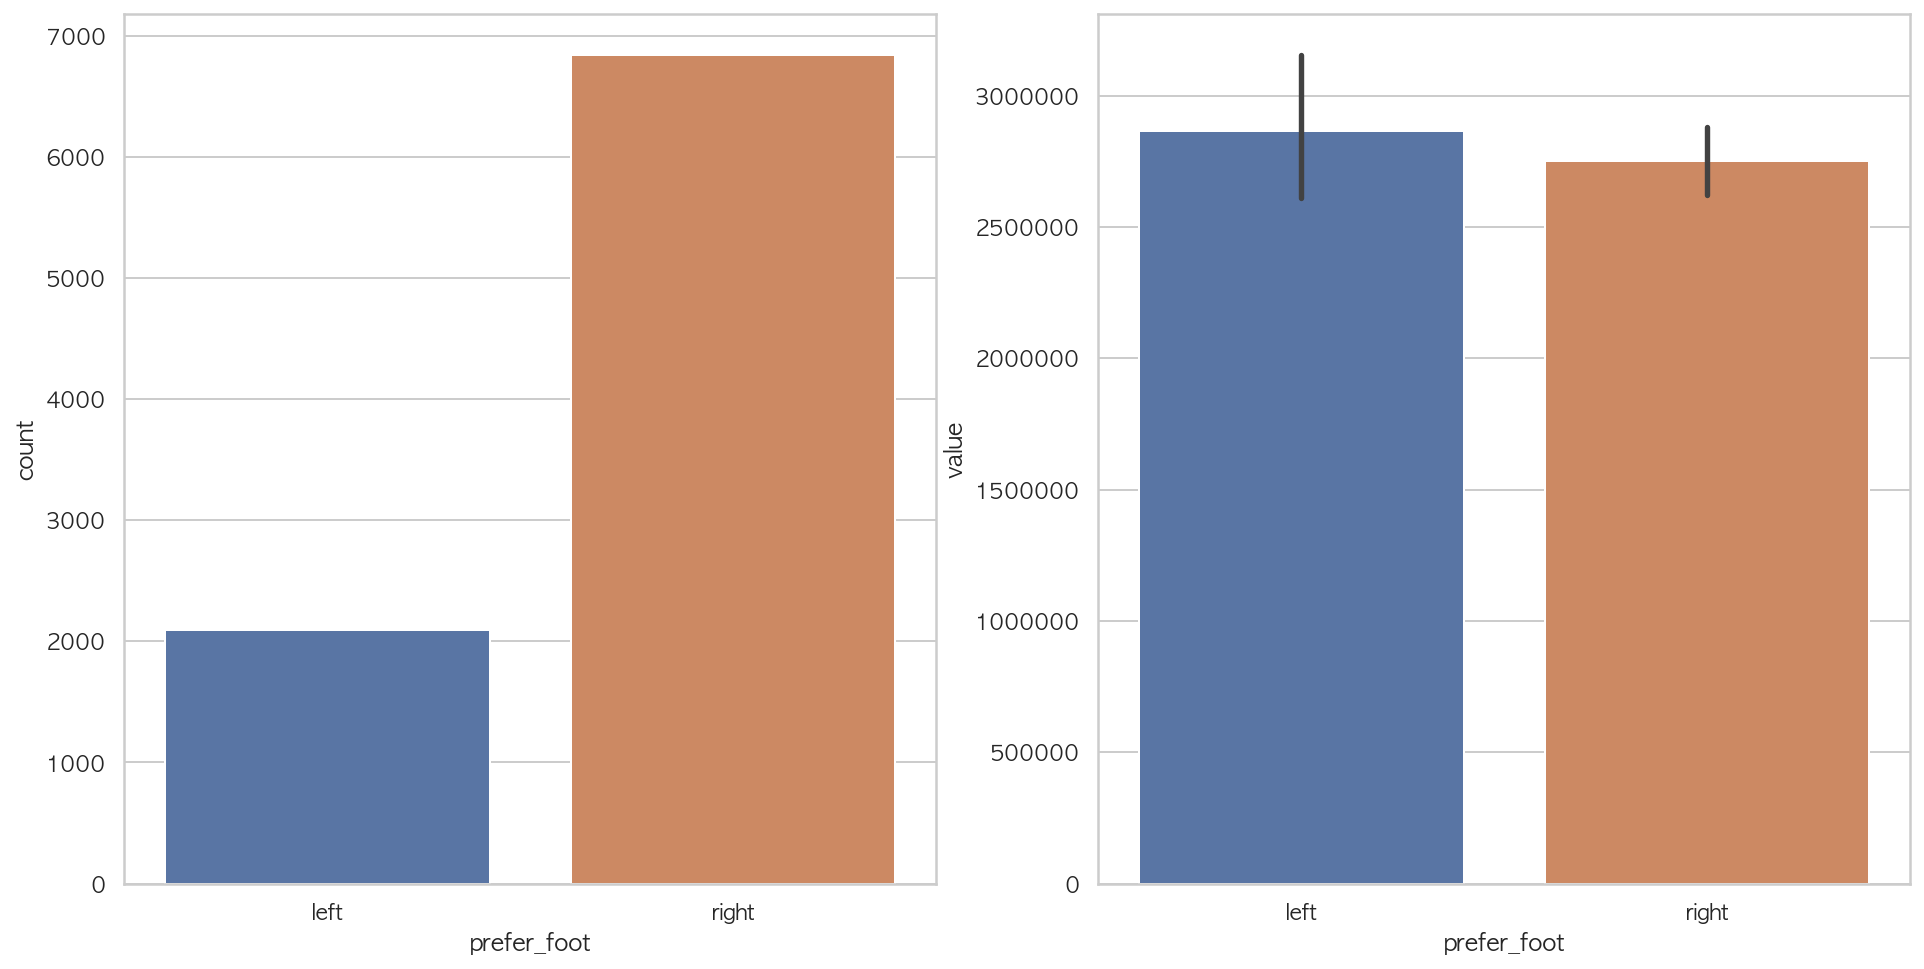

In [22]:
# 차트를 여러개 표현하기 위한 설정을 합니다.
figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 고정합니다.

# countplot 으로 주축발 빈도를 시각화 하고, ax1 에 설정합니다.
sns.countplot(data = train, x = "prefer_foot", ax = ax1)

# barplot 으로 주축발별 이적료를 시각화 하고, ax2 에 설정합니다.
sns.barplot(data = train, x = "prefer_foot", y = "value", ax = ax2)

왼발잡이 선수 보다 오른발잡이 선수가 압도적으로 많지만 이적료는 비슷한 수준임을 알 수 있습니다.

따라서, 왼발잡이 선수 중에 실력이 있는(혹은 잠재력이 높은) 선수가 많이 있을 것이라는 합리적인 추측을 할 수 있습니다.

### reputation 컬럼

In [23]:
train["reputation"].value_counts()

1.0    8014
2.0     706
3.0     177
4.0      31
5.0       4
Name: reputation, dtype: int64

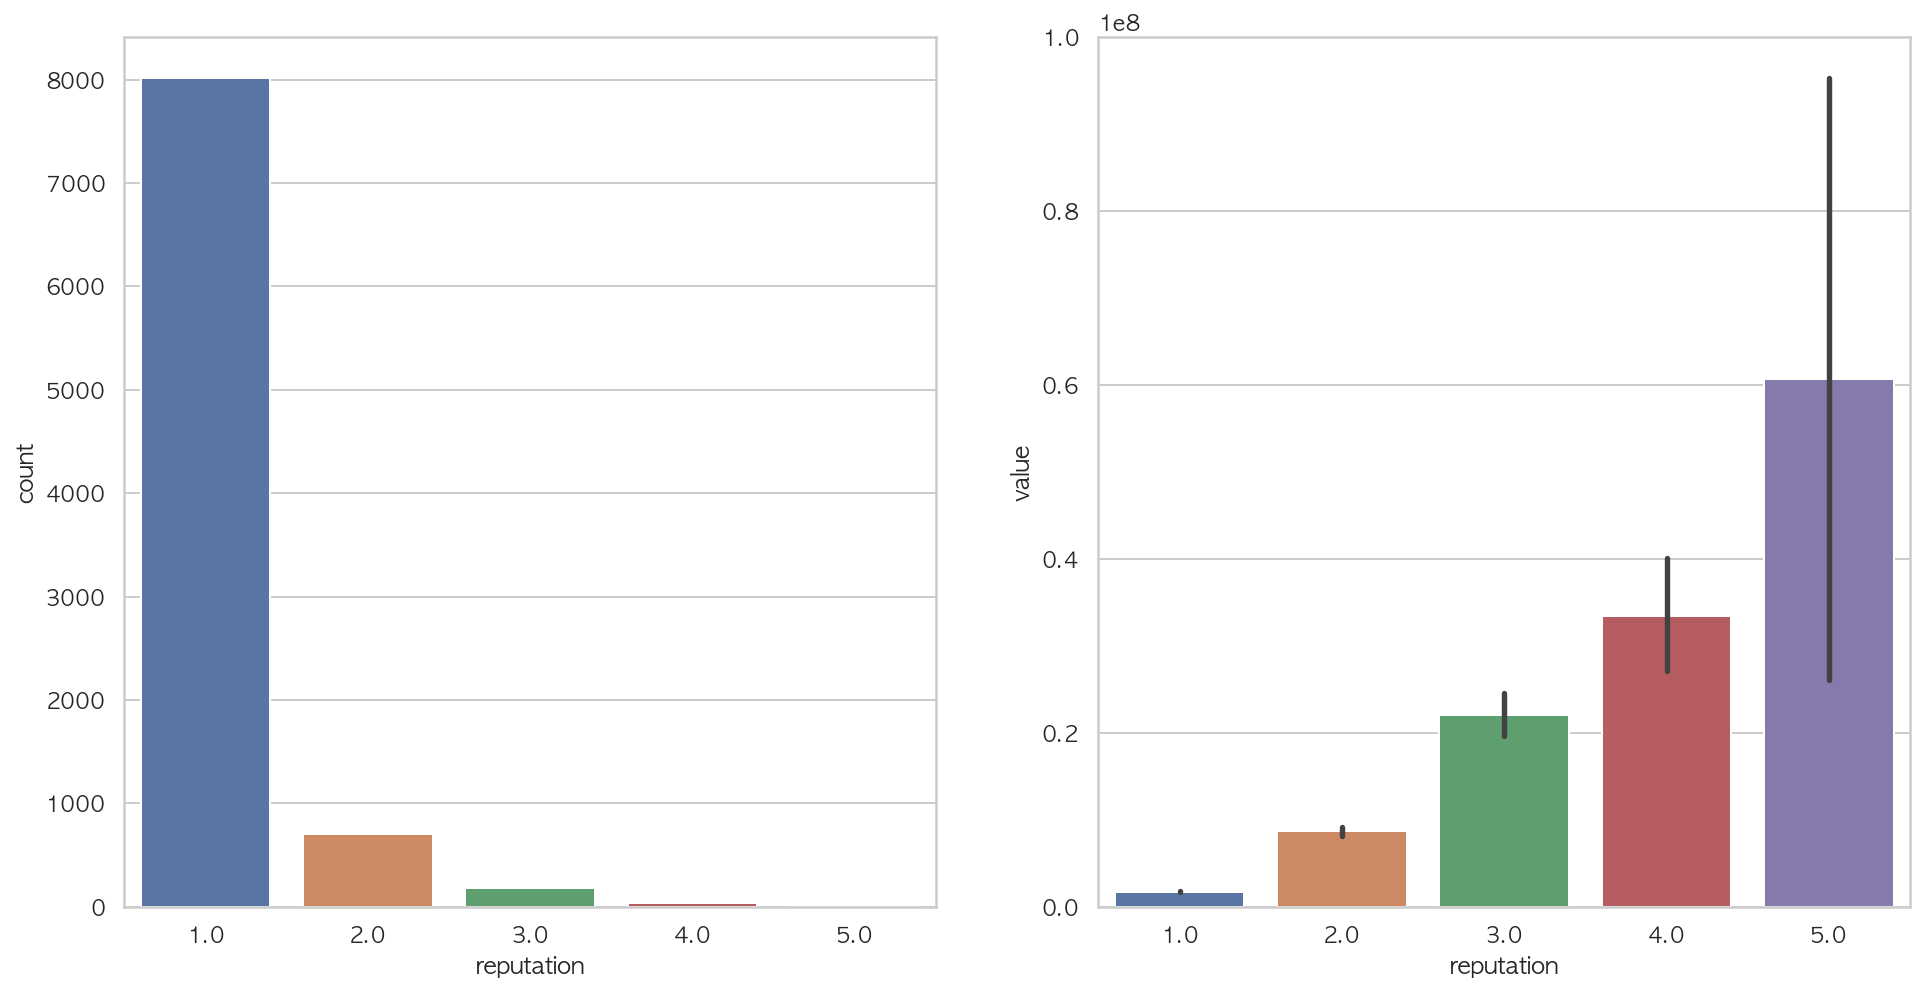

In [24]:
# 차트를 여러개 표현하기 위한 설정을 합니다.
figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 고정합니다.

# countplot 으로 주축발 빈도를 시각화 하고, ax1 에 설정합니다.
sns.countplot(data = train, x = "reputation", ax = ax1)

# barplot 으로 주축발별 이적료를 시각화 하고, ax2 에 설정합니다.
sns.barplot(data = train, x = "reputation", y = "value", ax = ax2)

현재 데이터에는 대부분 유명도가 떨어지는 선수들이 있다는 것을 알 수 있으며, 유명도가 높을수록 이적료도 높아 진다는 것을 확인 할 수 있습니다.

### stat_overall 컬럼

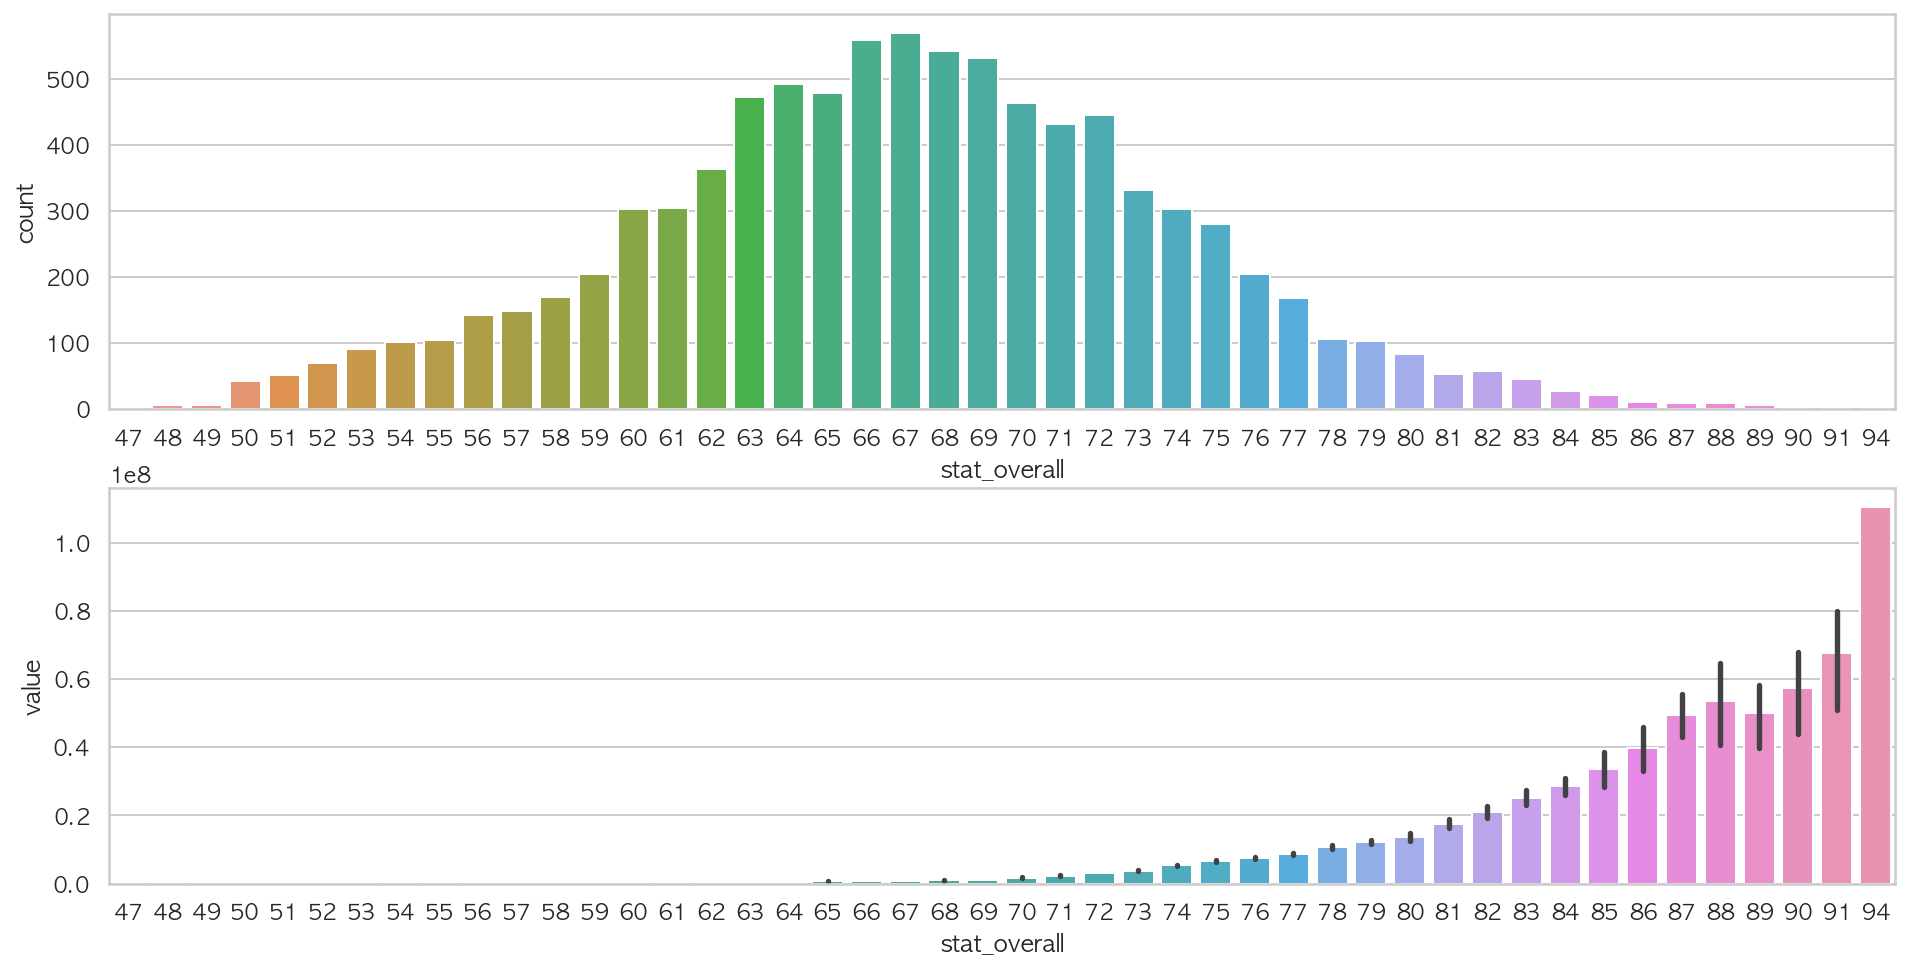

In [25]:
# 차트를 여러개 그리기 위한 설정을 합니다.
figure, ((ax1), (ax2)) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 설정 합니다.

# countplot 으로 현재 능력치 빈도를 시각화 하고, ax1 에 설정합니다.
sns.countplot(data = train, x = "stat_overall", ax = ax1)

# barplot 으로 현재 능력치별 이적료를 시각화 하고, ax2 에 설정합니다.
sns.barplot(data = train, x = "stat_overall", y = "value", ax = ax2)

현재 능력치는 정규분포에 가까운 형태를 나타내고 있으며 현재 능력치 63 ~ 72인 선수가 많다는 것을 알 수 있습니다.

또한, 현재 능력치가 높을 수록 이적료가 높다는 것을 알 수 있습니다.

### stat_potential 컬럼

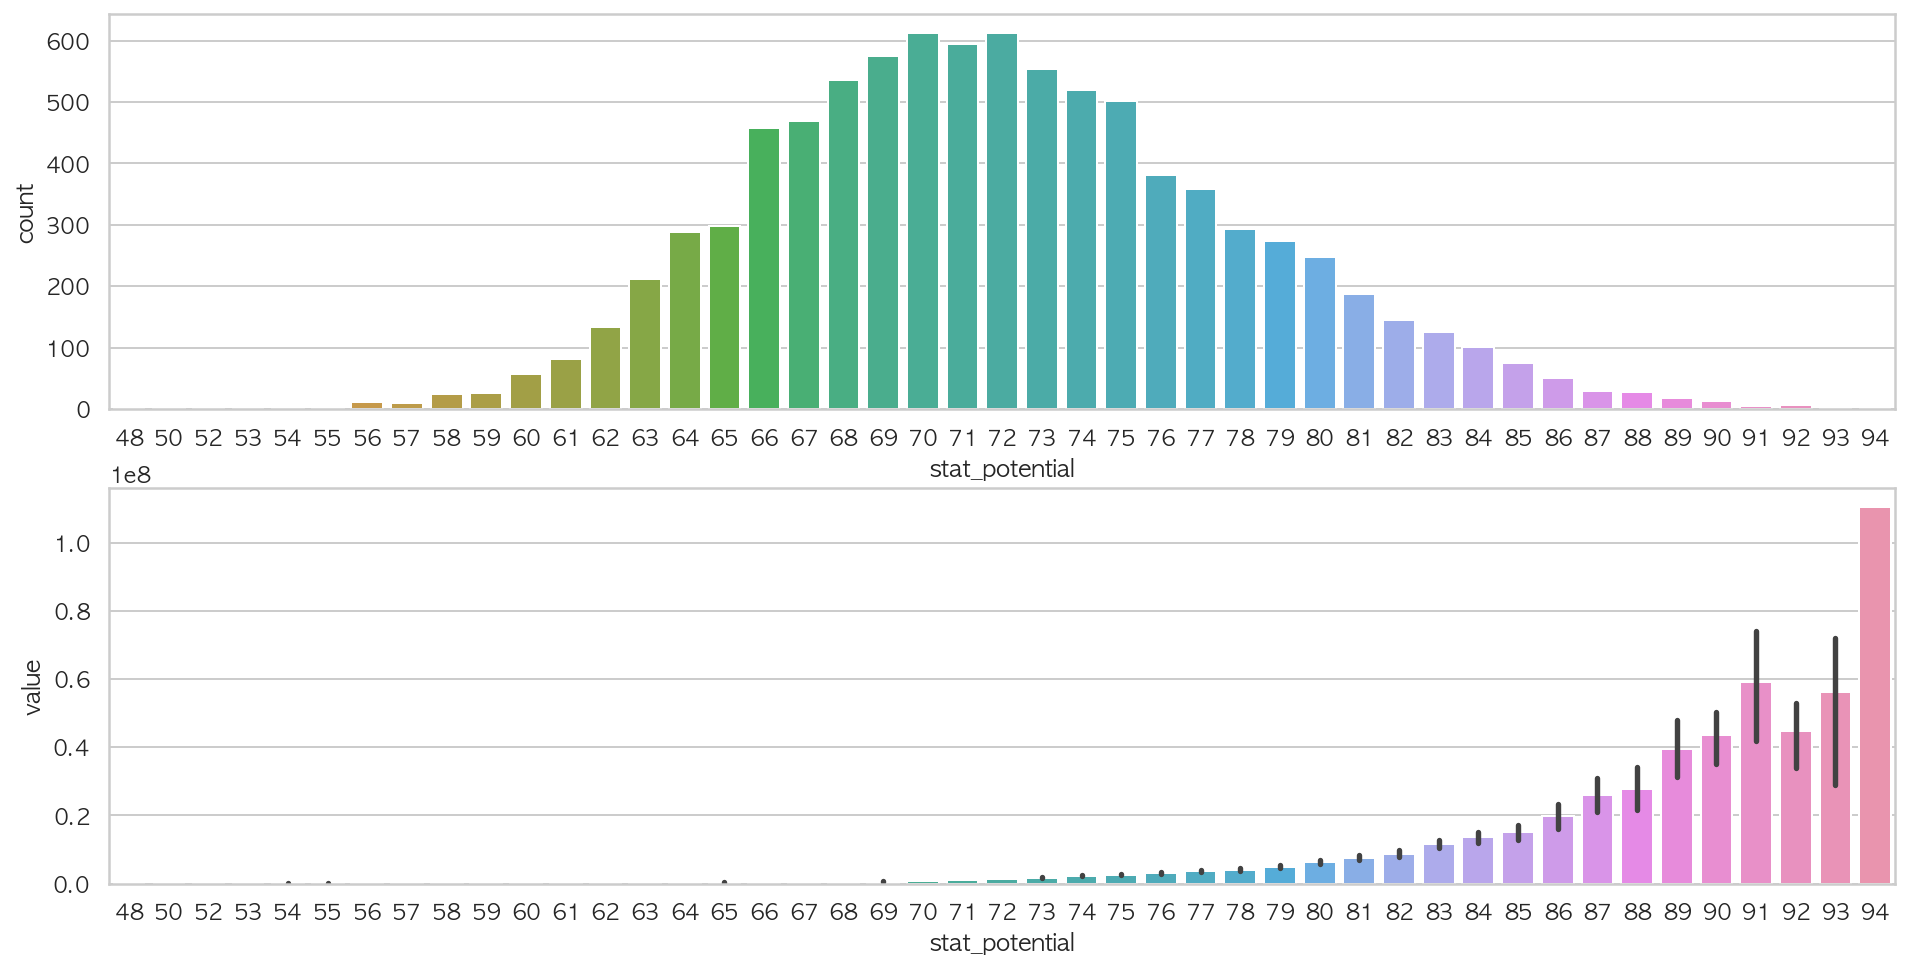

In [26]:
# 차트를 여러개 그리기 위한 설정을 합니다.
figure, ((ax1), (ax2)) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 설정 합니다.

# countplot 으로 잠재 능력치 빈도를 시각화 하고, ax1 에 설정합니다.
sns.countplot(data = train, x = "stat_potential", ax = ax1)

# barplot 으로 잠재 능력치별 이적료를 시각화 하고, ax2 에 설정합니다.
sns.barplot(data = train, x = "stat_potential", y = "value", ax = ax2)

잠재 능력치도 정규분포에 가까운 형태를 나타내고 있으며 잠재 능력치가 66 ~ 75인 선수가 많다는 것을 알 수 있습니다.

또한, 잠재 능력치가 높을 수록 이적료가 높다는 것을 알 수 있습니다.

### stat_skill_moves 컬럼

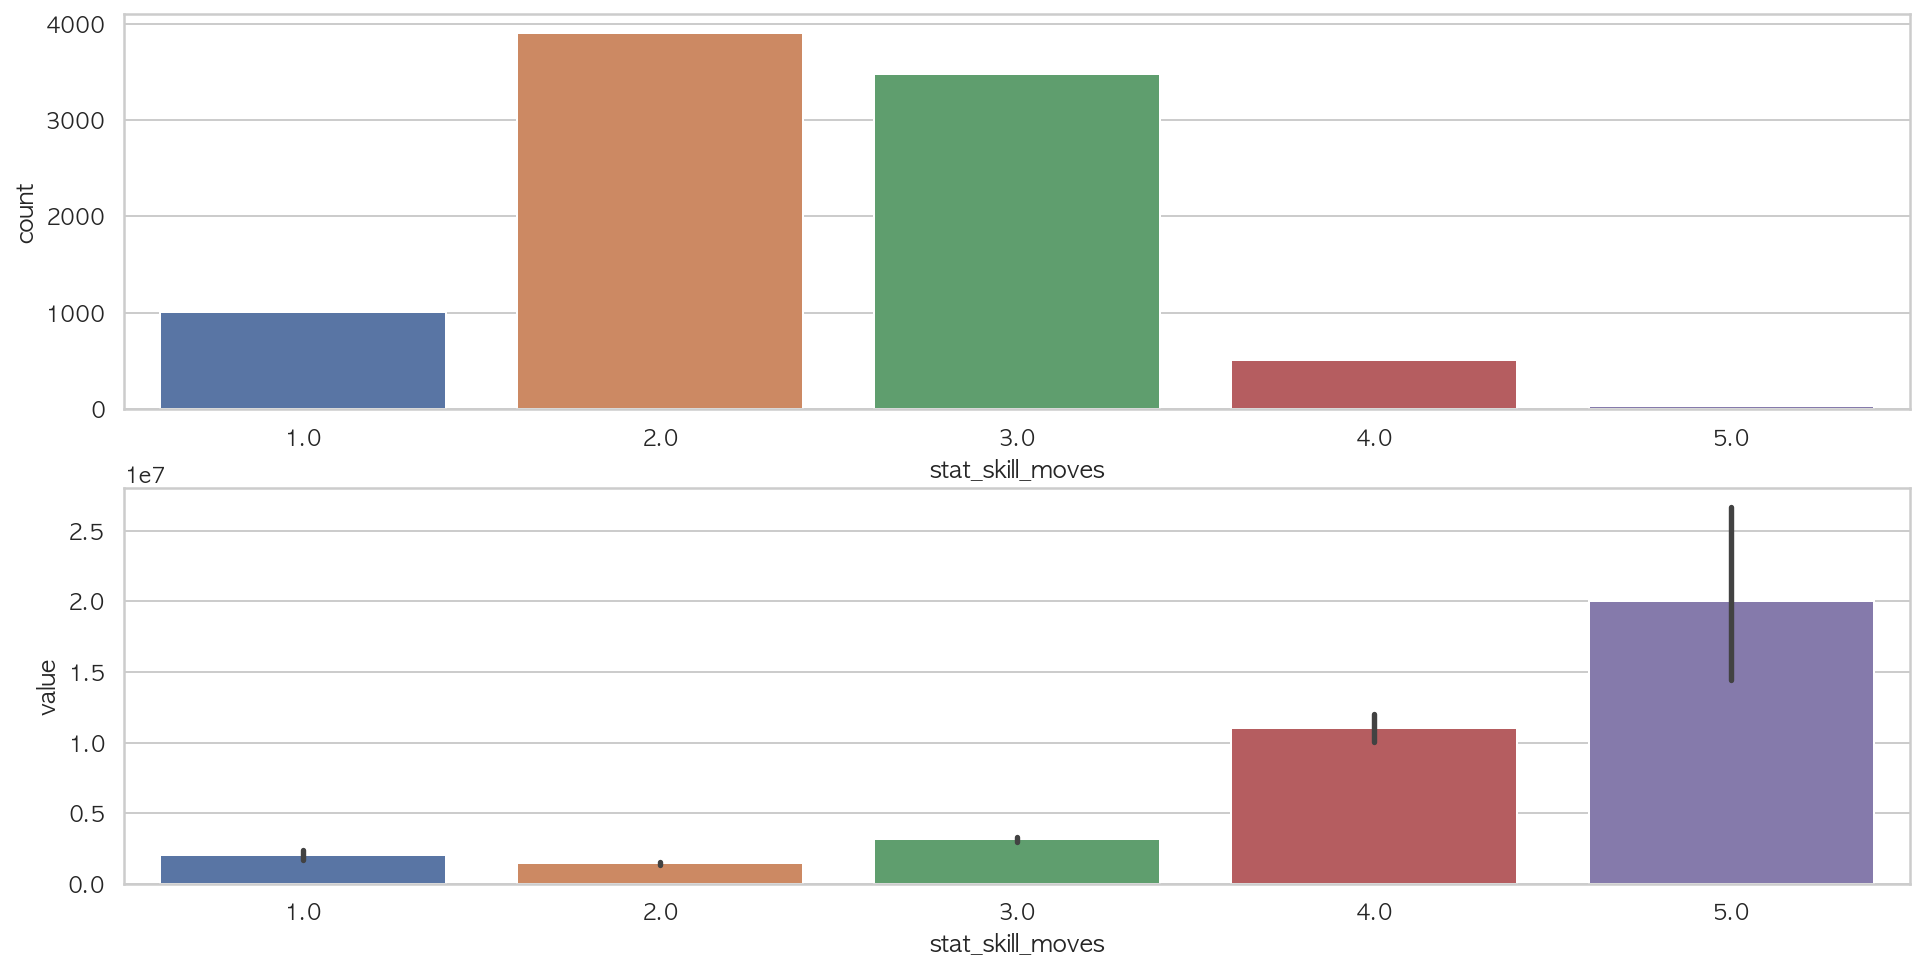

In [27]:
# 차트를 여러개 그리기 위한 설정을 합니다.
figure, ((ax1), (ax2)) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(16, 8) # 차트 크기를 가로 16인치, 세로 8인치로 설정 합니다.

# countplot 으로 잠재 능력치 빈도를 시각화 하고, ax1 에 설정합니다.
sns.countplot(data = train, x = "stat_skill_moves", ax = ax1)

# barplot 으로 잠재 능력치별 이적료를 시각화 하고, ax2 에 설정합니다.
sns.barplot(data = train, x = "stat_skill_moves", y = "value", ax = ax2)

개인기 능력치가 2, 3인 선수들이 많으며 개인기 능력치가 높을 수록 이적료도 높다는 것을 알 수 있습니다. 

---

## Feature engineering

### age 컬럼 engineering 및 one hot encoding

In [28]:
def find_age(row):
    if row < 20:
        return "10대"
    
    elif row < 25:
        return "20대 초반"
    
    elif row < 30:
        return "20대 후반"
    
    elif row < 35:
        return "30대 초반"
    
    elif row < 40:
        return "30대 후반"
    
    else:
        return "40대"

In [29]:
train["age(clean)"] = train["age"].apply(find_age)

In [30]:
test["age(clean)"] = test["age"].apply(find_age)

In [31]:
# continent 컬럼을 one hot encoding 으로 변환 후 각 신규 컬럼에 할당합니다.
train["age(10대)"] = train["age(clean)"] == "10대"
train["age(20대 초반)"] = train["age(clean)"] == "20대 초반"
train["age(20대 후반)"] = train["age(clean)"] == "20대 후반"
train["age(30대 초반)"] = train["age(clean)"] == "30대 초반"
train["age(30대 후반)"] = train["age(clean)"] == "30대 후반"
train["age(40대)"] = train["age(clean)"] == "40대"

In [32]:
test["age(10대)"] = train["age(clean)"] == "10대"
test["age(20대 초반)"] = test["age(clean)"] == "20대 초반"
test["age(20대 후반)"] = test["age(clean)"] == "20대 후반"
test["age(30대 초반)"] = test["age(clean)"] == "30대 초반"
test["age(30대 후반)"] = test["age(clean)"] == "30대 후반"
test["age(40대)"] = test["age(clean)"] == "40대"

In [33]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_until(clean),contract_until(year),contract_until(month),contract_until(day),age(clean),age(10대),age(20대 초반),age(20대 후반),age(30대 초반),age(30대 후반),age(40대)
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,2021-01-01,2021,1,1,30대 초반,False,False,False,True,False,False
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,2020-01-01,2020,1,1,20대 후반,False,False,True,False,False,False
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,2021-01-01,2021,1,1,30대 초반,False,False,False,True,False,False
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,2020-01-01,2020,1,1,30대 초반,False,False,False,True,False,False
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,2021-01-01,2021,1,1,20대 후반,False,False,True,False,False,False


---

### continent 컬럼 one hot encoding

In [34]:
# continent 컬럼을 one hot encoding 으로 변환 후 각 신규 컬럼에 할당합니다.
train["continent(sa)"] = train["continent"] == "south america"
train["continent(europe)"] = train["continent"] == "europe"
train["continent(africa)"] = train["continent"] == "africa"
train["continent(asia)"] = train["continent"] == "asia"
train["continent(oceania)"] = train["continent"] == "oceania"

print(train.shape) # train 데이터의 row, columns 갯수를 출력합니다.

# continent 와 관련된 컬럼의 상위 5개 자료를 출력합니다.
train[["continent", "continent(sa)", "continent(europe)", "continent(africa)",
       "continent(asia)", "continent(oceania)"]].head()

(8932, 28)


,continent,continent(sa),continent(europe),continent(africa),continent(asia),continent(oceania)
0,south america,True,False,False,False,False
1,europe,False,True,False,False,False
2,south america,True,False,False,False,False
3,europe,False,True,False,False,False
4,europe,False,True,False,False,False


In [35]:
# test 데이터의 continent 컬럼도 train 데이터와 동일하게 처리 합니다.
test["continent(sa)"] = test["continent"] == "south america"
test["continent(europe)"] = test["continent"] == "europe"
test["continent(africa)"] = test["continent"] == "africa"
test["continent(asia)"] = test["continent"] == "asia"
test["continent(oceania)"] = test["continent"] == "oceania"

print(test.shape) # test 데이터의 row, columns 갯수를 출력합니다.

# continent 와 관련된 컬럼의 상위 5개 자료를 출력합니다.
test[["continent", "continent(sa)", "continent(europe)", "continent(africa)",
      "continent(asia)", "continent(oceania)"]].head()

(3828, 27)


,continent,continent(sa),continent(europe),continent(africa),continent(asia),continent(oceania)
0,europe,False,True,False,False,False
1,south america,True,False,False,False,False
2,europe,False,True,False,False,False
3,europe,False,True,False,False,False
4,europe,False,True,False,False,False


## position 컬럼 one hot encoding

In [36]:
train["position"].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [37]:
# position 컬럼을 one hot encoding 으로 변환 후 각 신규 컬럼에 할당합니다.
train["position(MF)"] = train["position"] == "MF"
train["position(DF)"] = train["position"] == "DF"
train["position(ST)"] = train["position"] == "ST"
train["position(GK)"] = train["position"] == "GK"

print(train.shape) # train 데이터의 row, columns 갯수를 출력합니다.

# position 와 관련된 컬럼의 상위 5개 자료를 출력합니다.
train[["position", "position(MF)", "position(DF)", "position(ST)", "position(GK)"]].head()

(8932, 32)


,position,position(MF),position(DF),position(ST),position(GK)
0,ST,False,False,True,False
1,GK,False,False,False,True
2,ST,False,False,True,False
3,DF,False,True,False,False
4,GK,False,False,False,True


In [38]:
# test 데이터의 continent 컬럼도 train 데이터와 동일하게 처리 합니다.
test["position(MF)"] = test["position"] == "MF"
test["position(DF)"] = test["position"] == "DF"
test["position(ST)"] = test["position"] == "ST"
test["position(GK)"] = test["position"] == "GK"

print(test.shape) # test 데이터의 row, columns 갯수를 출력합니다.

# position 와 관련된 컬럼의 상위 5개 자료를 출력합니다.
test[["position", "position(MF)", "position(DF)", "position(ST)", "position(GK)"]].head()

(3828, 31)


,position,position(MF),position(DF),position(ST),position(GK)
0,ST,False,False,True,False
1,ST,False,False,True,False
2,MF,True,False,False,False
3,ST,False,False,True,False
4,MF,True,False,False,False


## prefer_foot 컬럼 one hot encoding 

In [39]:
train["prefer_foot"].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

In [40]:
# prefer_foot 컬럼을 one hot encoding 으로 변환 후 각 신규 컬럼에 할당합니다.
train["prefer_foot(right)"] = train["prefer_foot"] == "right"
train["prefer_foot(left)"] = train["prefer_foot"] == "left"

print(train.shape) # train 데이터의 row, columns 갯수를 출력합니다.

# position 와 관련된 컬럼의 상위 5개 자료를 출력합니다.
train[["prefer_foot", "prefer_foot(right)", "prefer_foot(left)"]].head()

(8932, 34)


,prefer_foot,prefer_foot(right),prefer_foot(left)
0,left,False,True
1,right,True,False
2,right,True,False
3,right,True,False
4,right,True,False


In [41]:
# test 데이터의 continent 컬럼도 train 데이터와 동일하게 처리 합니다.
test["prefer_foot(right)"] = test["prefer_foot"] == "right"
test["prefer_foot(left)"] = test["prefer_foot"] == "left"

print(test.shape) # test 데이터의 row, columns 갯수를 출력합니다.

# position 와 관련된 컬럼의 상위 5개 자료를 출력합니다.
test[["prefer_foot", "prefer_foot(right)", "prefer_foot(left)"]].head()

(3828, 33)


,prefer_foot,prefer_foot(right),prefer_foot(left)
0,right,True,False
1,right,True,False
2,right,True,False
3,right,True,False
4,right,True,False


---

## Train

In [48]:
# feature 로 사용할 컬럼을 feature_names 이라는 변수에 할당 합니다.
feature_names = ['age', 'age(10대)', 'age(20대 초반)', 'age(20대 후반)', 'age(30대 초반)', 'age(30대 후반)',
                 'age(40대)', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
                'contract_until(year)','contract_until(month)', 'contract_until(day)',
                 'continent(sa)', 'continent(europe)', 'continent(africa)',
                'continent(asia)', 'continent(oceania)', 'position(MF)', 'position(DF)',
                'position(ST)', 'position(GK)', 'prefer_foot(right)', 'prefer_foot(left)']


In [49]:
# value 컬럼을 label_name 이라는 변수에 할당합니다.
label_name = "value"
label_name

'value'

In [50]:
# feature_names 를 활용해 train 데이터의 feature 를 가져오고 이를 X_train 이라는 변수에 할당합니다.
X_train = train[feature_names]

print(X_train.shape) # X_train 데이터의 row, column 갯수를 출력 합니다.
X_train.head() # X_train 데이터의 상위 5개 자료를 출력 합니다.

(8932, 25)


,age,age(10대),age(20대 초반),age(20대 후반),age(30대 초반),age(30대 후반),age(40대),reputation,stat_overall,stat_potential,stat_skill_moves,contract_until(year),contract_until(month),contract_until(day),continent(sa),continent(europe),continent(africa),continent(asia),continent(oceania),position(MF),position(DF),position(ST),position(GK),prefer_foot(right),prefer_foot(left)
0,31,False,False,False,True,False,False,5.0,94,94,4.0,2021,1,1,True,False,False,False,False,False,False,True,False,False,True
1,27,False,False,True,False,False,False,4.0,91,93,1.0,2020,1,1,False,True,False,False,False,False,False,False,True,True,False
2,31,False,False,False,True,False,False,5.0,91,91,3.0,2021,1,1,True,False,False,False,False,False,False,True,False,True,False
3,32,False,False,False,True,False,False,4.0,91,91,3.0,2020,1,1,False,True,False,False,False,False,True,False,False,True,False
4,25,False,False,True,False,False,False,3.0,90,93,1.0,2021,1,1,False,True,False,False,False,False,False,False,True,True,False


In [51]:
# feature_names 를 활용해 test 데이터의 feature 를 가져오고 이를 X_test 이라는 변수에 할당합니다.
X_test = test[feature_names]

print(X_test.shape) # X_test 데이터의 row, column 갯수를 출력 합니다.
X_test.head() # X_test 데이터의 상위 5개 자료를 출력 합니다.

(3828, 25)


,age,age(10대),age(20대 초반),age(20대 후반),age(30대 초반),age(30대 후반),age(40대),reputation,stat_overall,stat_potential,stat_skill_moves,contract_until(year),contract_until(month),contract_until(day),continent(sa),continent(europe),continent(africa),continent(asia),continent(oceania),position(MF),position(DF),position(ST),position(GK),prefer_foot(right),prefer_foot(left)
0,33,False,False,False,True,False,False,5.0,94,94,5.0,2022,1,1,False,True,False,False,False,False,False,True,False,True,False
1,26,False,False,True,False,False,False,5.0,92,93,5.0,2022,1,1,True,False,False,False,False,False,False,True,False,True,False
2,27,False,False,True,False,False,False,4.0,91,92,4.0,2023,1,1,False,True,False,False,False,True,False,False,False,True,False
3,27,False,False,True,False,False,False,4.0,91,91,4.0,2020,1,1,False,True,False,False,False,False,False,True,False,True,False
4,32,False,False,False,True,False,False,4.0,91,91,4.0,2020,1,1,False,True,False,False,False,True,False,False,False,True,False


In [52]:
# label_name 을 활용해 train 데이터의 label 을 가져오고 이를 y_train 이라는 변수에 할당합니다.
y_train = train[label_name]

print(y_train.shape) # y_train 데이터의 row, column 갯수를 출력 합니다.
y_train.head() # y_train 데이터의 상위 5개 자료를 띄웁니다.

(8932,)


0    110500000.0
1     72000000.0
2     80000000.0
3     51000000.0
4     68000000.0
Name: value, dtype: float64

---

## Evaluation

In [97]:
# LGBMRegressor 를 불러옵니다.
from lightgbm import LGBMRegressor

# random_state 와 metric 만 설정 후 LGBMRegressor 를 model 이라는 변수에 할당합니다.
model = LGBMRegressor(random_state = 37, metric = "mse")

model # model 을 출력합니다.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              metric='mse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [98]:
# cross_val_score 를 불러옵니다.
from sklearn.model_selection import cross_val_score

# scoring 은 neg_mean_squared_error, cv 는 20으로 설정 후 
# cross validation 결과를 y_predict 라는 변수에 할당합니다.
y_predict = cross_val_score(model, X_train, y_train,
                            scoring="neg_mean_squared_error", cv = 20)

# RMSE 값을 score 라는 변수에 할당합니다.
score = np.sqrt(-y_predict)

In [99]:
def display_scores(scores): # score 의 점수, 평균, 표준편차를 설정하는 함수를 정의합니다.
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(score) # display_scores 함수에 score 를 대입합니다.

점수: [16277883.38954416  1010226.84580683   796231.42801933   338053.82064615
   247045.23898952   156165.20630898   155295.68836744    98955.12688263
    66539.19093593    76208.60303467    51966.60101636    67238.60154443
    65261.56432049    48785.52756643    43221.67839609    42723.80511379
    60619.60373518    39504.18049004    41842.38588602    54325.67826508]
평균: 986904.7082434787
표준편차: 3517213.010416289


In [56]:
# 평균: 986904.7082434787

---

## Coarse Search

In [103]:
n_estimators = 1000 # 트리 갯수를 설정합니다.
num_loop = 50 # 랜덤 서치를 반복할 횟수를 설정합니다.

# coarse_hyperparameters_list 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

for loop in range(num_loop): # 이론 상으로 존재하는 모든 하이퍼패러미터 범위를 찾습니다.
    
    learning_rate = np.random.uniform(low = 0.01, high = 0.1)
    max_depth = np.random.randint(low = 2, high = 100)        
    num_leaves = np.random.randint(2, 500)            
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    # 이를 LGBMRegressor 로 만듭니다.
    model = LGBMRegressor(random_state = 37,
                          learning_rate = learning_rate,
                          n_estimators = n_estimators,                          
                          max_depth = max_depth,                                                   
                          num_leaves = num_leaves,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          metric = "mse")
    
    # cross validation 결과를 y_predict 에 할당합니다.
    y_predict = cross_val_score(model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv = 20)
    
    # RMSE 값 평균의 반올림 값을 score 에 할당합니다.
    score = np.sqrt(-y_predict).mean().round()
    
    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    hyperparameters = {
        'loop' : loop,
        'score' : score,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,        
        'max_depth' : max_depth,       
        'num_leaves' : num_leaves,        
        'subsample' : subsample,
        'colsample_bytree' : colsample_bytree,        
    }
    
    coarse_hyperparameters_list.append(hyperparameters)
    
    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{loop:2} learning_rate = {learning_rate:.6f}, n_estimators = {n_estimators}, \
          max_depth = {max_depth}, num_leaves = {num_leaves}, subsample = {subsample:.6f}, \
          colsample_bytree = {colsample_bytree:.6f}, score = {score}")

# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

# print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 5개를 출력합니다.
coarse_hyperparameters_list.head()  

 0 learning_rate = 0.021224, n_estimators = 1000,           max_depth = 24, num_leaves = 358, subsample = 0.502573,           colsample_bytree = 0.578783, score = 1022114.0
 1 learning_rate = 0.033049, n_estimators = 1000,           max_depth = 4, num_leaves = 388, subsample = 0.406528,           colsample_bytree = 0.785355, score = 1029444.0
 2 learning_rate = 0.099774, n_estimators = 1000,           max_depth = 57, num_leaves = 17, subsample = 0.970676,           colsample_bytree = 0.262880, score = 1071891.0
 3 learning_rate = 0.048963, n_estimators = 1000,           max_depth = 84, num_leaves = 389, subsample = 0.652423,           colsample_bytree = 0.479148, score = 1027312.0
 4 learning_rate = 0.075542, n_estimators = 1000,           max_depth = 55, num_leaves = 337, subsample = 0.935385,           colsample_bytree = 0.350550, score = 1078815.0
 5 learning_rate = 0.026426, n_estimators = 1000,           max_depth = 61, num_leaves = 48, subsample = 0.284731,           colsample_by

48 learning_rate = 0.089799, n_estimators = 1000,           max_depth = 18, num_leaves = 185, subsample = 0.792739,           colsample_bytree = 0.588414, score = 1013573.0
49 learning_rate = 0.034746, n_estimators = 1000,           max_depth = 82, num_leaves = 479, subsample = 0.462476,           colsample_bytree = 0.871142, score = 984333.0
(50, 8)


,loop,score,learning_rate,n_estimators,max_depth,num_leaves,subsample,colsample_bytree
19,19,964702.0,0.076291,1000,31,101,0.798932,0.982347
34,34,975215.0,0.062034,1000,34,67,0.636046,0.833883
31,31,976402.0,0.017335,1000,47,25,0.343640,0.926409
5,5,976862.0,0.026426,1000,61,48,0.284731,0.785130
42,42,977117.0,0.053940,1000,40,364,0.874397,0.979630
7,7,979495.0,0.023246,1000,98,84,0.600889,0.799505
30,30,980217.0,0.087814,1000,11,99,0.296915,0.850902
36,36,980653.0,0.039192,1000,15,413,0.716594,0.796430
16,16,982716.0,0.048550,1000,11,202,0.911263,0.788851
47,47,983636.0,0.063355,1000,89,130,0.824778,0.777726


---

## Random Search(Fine)

In [105]:
n_estimators = 1000 # 트리 갯수를 설정합니다.
num_loop = 50 # 랜덤 서치를 반복할 횟수를 설정합니다.

# finer_hyperparameters_list 탐색 결과를 리스트로 저장합니다.
finer_hyperparameters_list = []

for loop in range(num_loop): # 이론 상으로 존재하는 모든 하이퍼패러미터 범위를 찾습니다.
    learning_rate = np.random.uniform(low = 0.017335, high = 0.076291)
    max_depth = np.random.randint(low = 31, high = 61)        
    num_leaves = np.random.randint(low = 25, high = 364)            
    subsample = np.random.uniform(low = 0.284731, high = 0.874397)
    colsample_bytree = np.random.uniform(low = 0.785130, high = 0.982347)
    
    # 이를 LGBMRegressor 로 만듭니다.
    model = LGBMRegressor(random_state = 37,
                          learning_rate = learning_rate,
                          n_estimators = n_estimators,                          
                          max_depth = max_depth,                                                   
                          num_leaves = num_leaves,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          metric = "mse")
    
    # cross validation 결과를 y_predict 에 할당합니다.
    y_predict = cross_val_score(model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv = 20)
    
    # RMSE 값 평균의 반올림 값을 score 에 할당합니다.
    score = np.sqrt(-y_predict).mean().round()
    
    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    finer_hyperparameters = {
        'loop' : loop,
        'score' : score,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,        
        'max_depth' : max_depth,       
        'num_leaves' : num_leaves,        
        'subsample' : subsample,
        'colsample_bytree' : colsample_bytree,   
    }
    
    finer_hyperparameters_list.append(finer_hyperparameters)
    
    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{loop:2} learning_rate = {learning_rate:.6f}, n_estimators = {n_estimators}, \
          max_depth = {max_depth}, num_leaves = {num_leaves}, subsample = {subsample:.6f}, \
          colsample_bytree = {colsample_bytree:.6f}, score = {score}")

# finer_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

# 변환한 finer_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

# finer_hyperparameters_list의 상위 5개를 출력합니다.
finer_hyperparameters_list.head()

 0 learning_rate = 0.020522, n_estimators = 1000,           max_depth = 45, num_leaves = 305, subsample = 0.640637,           colsample_bytree = 0.883287, score = 975350.0
 1 learning_rate = 0.065747, n_estimators = 1000,           max_depth = 55, num_leaves = 203, subsample = 0.568001,           colsample_bytree = 0.926225, score = 975898.0
 2 learning_rate = 0.051195, n_estimators = 1000,           max_depth = 53, num_leaves = 69, subsample = 0.621675,           colsample_bytree = 0.884367, score = 969415.0
 3 learning_rate = 0.066778, n_estimators = 1000,           max_depth = 50, num_leaves = 142, subsample = 0.711355,           colsample_bytree = 0.866371, score = 977874.0
 4 learning_rate = 0.064203, n_estimators = 1000,           max_depth = 50, num_leaves = 226, subsample = 0.744003,           colsample_bytree = 0.877641, score = 981119.0
 5 learning_rate = 0.055412, n_estimators = 1000,           max_depth = 46, num_leaves = 140, subsample = 0.871458,           colsample_bytre

48 learning_rate = 0.046656, n_estimators = 1000,           max_depth = 39, num_leaves = 120, subsample = 0.307096,           colsample_bytree = 0.930532, score = 968001.0
49 learning_rate = 0.057364, n_estimators = 1000,           max_depth = 46, num_leaves = 283, subsample = 0.805560,           colsample_bytree = 0.975074, score = 970677.0


,loop,score,learning_rate,n_estimators,max_depth,num_leaves,subsample,colsample_bytree
32,32,966652.0,0.064360,1000,59,130,0.570093,0.971329
48,48,968001.0,0.046656,1000,39,120,0.307096,0.930532
27,27,968314.0,0.041906,1000,56,37,0.560615,0.796870
31,31,969055.0,0.058515,1000,37,27,0.678976,0.918208
22,22,969216.0,0.056293,1000,49,46,0.474907,0.953168


In [106]:
# finer search로 찾은 가장 좋은 하이퍼패러미터 값을
# best_hyperparameters 라는 변수에 할당합니다.
best_hyperparameters = finer_hyperparameters_list.iloc[0]

# best_hyperparameters 를 출력합니다.
best_hyperparameters

loop                    32.000000
score               966652.000000
learning_rate            0.064360
n_estimators          1000.000000
max_depth               59.000000
num_leaves             130.000000
subsample                0.570093
colsample_bytree         0.971329
Name: 32, dtype: float64

## Fit

In [107]:
# 가장 좋은 하이퍼패러미터로 LGBMRegressor 를 만든 후
# model 이라는 변수에 할당합니다.
model = LGBMRegressor(random_state = 37,
                      learning_rate = 0.064360,
                      n_estimators = 1000,
                      max_depth = 59,
                      num_leaves = 130,
                      subsample = 0.570093,
                      colsample_bytree = 0.971329,
                      metric = "mse")

model # model 을 출력합니다.

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.971329, importance_type='split',
              learning_rate=0.06436, max_depth=59, metric='mse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=130, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.570093, subsample_for_bin=200000, subsample_freq=0)

In [108]:
# model 에 X_train, y_train 을 학습합니다.
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.971329, importance_type='split',
              learning_rate=0.06436, max_depth=59, metric='mse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=130, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.570093, subsample_for_bin=200000, subsample_freq=0)

In [109]:
# 학습한 model 로 cross validation 값을 측정 후 
# y_predict 라는 변수에 할당합니다.
y_predict = cross_val_score(model, X_train, y_train,
                            scoring="neg_mean_squared_error", cv = 20)

# y_predict 의 RMSE 값을 score 라는 변수에 할당합니다.
score = np.sqrt(-y_predict)

In [110]:
def display_scores(scores): # score 의 점수, 평균, 표준편차를 설정하는 함수를 정의합니다.
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(score) # display_scores 함수에 score 를 대입합니다.

점수: [16120341.84514484   949416.82777487   735418.53617858   331904.01710395
   254325.00196463   176296.94716451   138378.11109697   110280.22506094
    60056.75731183    64642.67403319    52616.2127751     45177.92366356
    40739.75509597    36410.43079618    27651.88143232    26512.42086507
    47848.66622109    28612.63672756    23637.78996884    47075.64734337]
평균: 965867.2153861688
표준편차: 3485038.218825731


In [111]:
# 평균: 965867.2153861688

---

## Predict

In [112]:
# 학습한 model 에 X_test 를 예측한 후 prediction 이라는 변수에 할당합니다.
prediction = model.predict(X_test)

print(prediction.shape) # prediction 의 row, column 갯수를 출력합니다.
prediction # prediction 을 출력합니다.

(3828,)


array([6.90471200e+07, 8.04341705e+07, 7.45200654e+07, ...,
       5.64048879e+04, 5.42805909e+04, 5.46105561e+04])

---

## Submit

In [113]:
# 제출 형식을 불러온 후 submit 이라는 변수에 할당합니다.
submit = pd.read_csv("data/submission.csv")

# submit 의 value 컬럼에 prediction 값을 설정합니다.
submit["value"] = prediction

print(submit.shape) # submit 의 row, column 갯수를 출력합니다.
submit.head() # submit 을 상위 5개 자료를 출력합니다.

(3828, 2)


,id,value
0,1,6.904712e+07
1,2,8.043417e+07
2,4,7.452007e+07
3,5,8.357388e+07
4,6,6.419942e+07


In [114]:
# index 를 뺀 submit 데이터를 submission.csv 로 만듭니다.
submit.to_csv("submission.csv", index = False)